# 1. Importing the Libraries

In [1]:
import pandas as pd #provides Easy to use datstructures and various data analysis tools                 
import numpy as np #provides advanced math functions
import seaborn as sns 
import matplotlib.pyplot as plt #Matplotlib helps with data analyzing, and is a numerical plotting library. 
from sklearn.model_selection import train_test_split #It contains a numerous number of algorithms for implementing standard machine learning models
from sklearn.metrics import mean_squared_error ,r2_score

from sklearn import linear_model

# 2. Import Train Dataset

In [2]:
#Reading the train data set of Ames Housing Data Set
tr=pd.read_csv("train.csv")
print(tr.shape)#Dimensions of Data Frame 
tr.head()#Let's take a look at top 5 rows of our train dataset,


(1460, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# 3. Exploring the Target Variable i.e. 'SalePrice'

In [3]:
tr.columns#Exploring the columns of our dataset

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [4]:
tr.SalePrice.describe()#Lets take a look at some of the description of the feature that we are goig to predict in the model using describe() method

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [5]:
tr['SalePrice'].head()

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

(array([148., 723., 373., 135.,  51.,  19.,   4.,   3.,   2.,   2.]),
 array([ 34900., 106910., 178920., 250930., 322940., 394950., 466960.,
        538970., 610980., 682990., 755000.]),
 <a list of 10 Patch objects>)

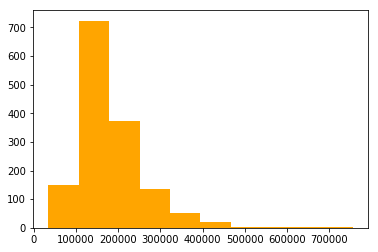

In [6]:
plt.hist(tr.SalePrice, color='orange')#Let's take a look at the skewness of the following plot , we see that it is positively skewed .

In [7]:
mod = np.log(tr.SalePrice)#Let us take log to increase the linearity of the 'SalePrice'
tr['log_sp'] = mod#add one more column to the datset for future reference

In [8]:
tr.shape#shape after adding one more column

(1460, 82)

In [9]:
tr['log_sp'].head()

0    12.247694
1    12.109011
2    12.317167
3    11.849398
4    12.429216
Name: log_sp, dtype: float64

(array([  5.,  12.,  54., 184., 470., 400., 220.,  90.,  19.,   6.]),
 array([10.46024211, 10.7676652 , 11.07508829, 11.38251138, 11.68993448,
        11.99735757, 12.30478066, 12.61220375, 12.91962684, 13.22704994,
        13.53447303]),
 <a list of 10 Patch objects>)

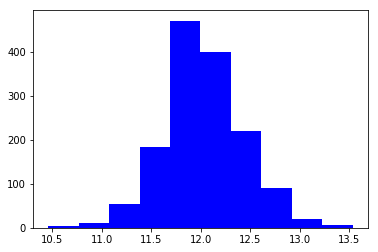

In [10]:
plt.hist(tr.log_sp, color='blue')#We note that ,the skewness has shifted to 0 .(evident from the figure following)

# 4.  Prepare the Data to fit it in the model/EDA

In [11]:
del tr['Id']#Deleting this column ,as it is nada related to Our Trget fetaure ['SalePrice']



In [12]:
tr.shape#shape after deleting 'ID'

(1460, 81)

In [13]:
number_feat = tr.select_dtypes(include=[np.number])#DataFrame that includes only numeric features

print(number_feat.dtypes)

MSSubClass         int64
LotFrontage      float64
LotArea            int64
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
MasVnrArea       float64
BsmtFinSF1         int64
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
1stFlrSF           int64
2ndFlrSF           int64
LowQualFinSF       int64
GrLivArea          int64
BsmtFullBath       int64
BsmtHalfBath       int64
FullBath           int64
HalfBath           int64
BedroomAbvGr       int64
KitchenAbvGr       int64
TotRmsAbvGrd       int64
Fireplaces         int64
GarageYrBlt      float64
GarageCars         int64
GarageArea         int64
WoodDeckSF         int64
OpenPorchSF        int64
EnclosedPorch      int64
3SsnPorch          int64
ScreenPorch        int64
PoolArea           int64
MiscVal            int64
MoSold             int64
YrSold             int64
SalePrice          int64
log_sp           float64
dtype: object


In [14]:
char_feat = tr.select_dtypes(exclude=[np.number])#DataFrame that includes only object features

print(char_feat.dtypes)

MSZoning         object
Street           object
Alley            object
LotShape         object
LandContour      object
Utilities        object
LotConfig        object
LandSlope        object
Neighborhood     object
Condition1       object
Condition2       object
BldgType         object
HouseStyle       object
RoofStyle        object
RoofMatl         object
Exterior1st      object
Exterior2nd      object
MasVnrType       object
ExterQual        object
ExterCond        object
Foundation       object
BsmtQual         object
BsmtCond         object
BsmtExposure     object
BsmtFinType1     object
BsmtFinType2     object
Heating          object
HeatingQC        object
CentralAir       object
Electrical       object
KitchenQual      object
Functional       object
FireplaceQu      object
GarageType       object
GarageFinish     object
GarageQual       object
GarageCond       object
PavedDrive       object
PoolQC           object
Fence            object
MiscFeature      object
SaleType        

In [15]:
tr.drop(columns = char_feat).head()


,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,log_sp
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,61,0,0,0,0,0,2,2008,208500,12.247694
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,0,0,0,0,0,0,5,2007,181500,12.109011
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,42,0,0,0,0,0,9,2008,223500,12.317167
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,35,272,0,0,0,0,2,2006,140000,11.849398
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,84,0,0,0,0,0,12,2008,250000,12.429216


Find the correlation matrix between all the numeric features to incurr important dependencies of 'SalePrice' over other features.

In [16]:
correlation = number_feat.corr()#Find the correlation matrix of all the numeric features , to find out the relation between features and target variable.
print(correlation)

               MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  \
MSSubClass       1.000000    -0.386347 -0.139781     0.032628    -0.059316   
LotFrontage     -0.386347     1.000000  0.426095     0.251646    -0.059213   
LotArea         -0.139781     0.426095  1.000000     0.105806    -0.005636   
OverallQual      0.032628     0.251646  0.105806     1.000000    -0.091932   
OverallCond     -0.059316    -0.059213 -0.005636    -0.091932     1.000000   
YearBuilt        0.027850     0.123349  0.014228     0.572323    -0.375983   
YearRemodAdd     0.040581     0.088866  0.013788     0.550684     0.073741   
MasVnrArea       0.022936     0.193458  0.104160     0.411876    -0.128101   
BsmtFinSF1      -0.069836     0.233633  0.214103     0.239666    -0.046231   
BsmtFinSF2      -0.065649     0.049900  0.111170    -0.059119     0.040229   
BsmtUnfSF       -0.140759     0.132644 -0.002618     0.308159    -0.136841   
TotalBsmtSF     -0.238518     0.392075  0.260833     0.537808   

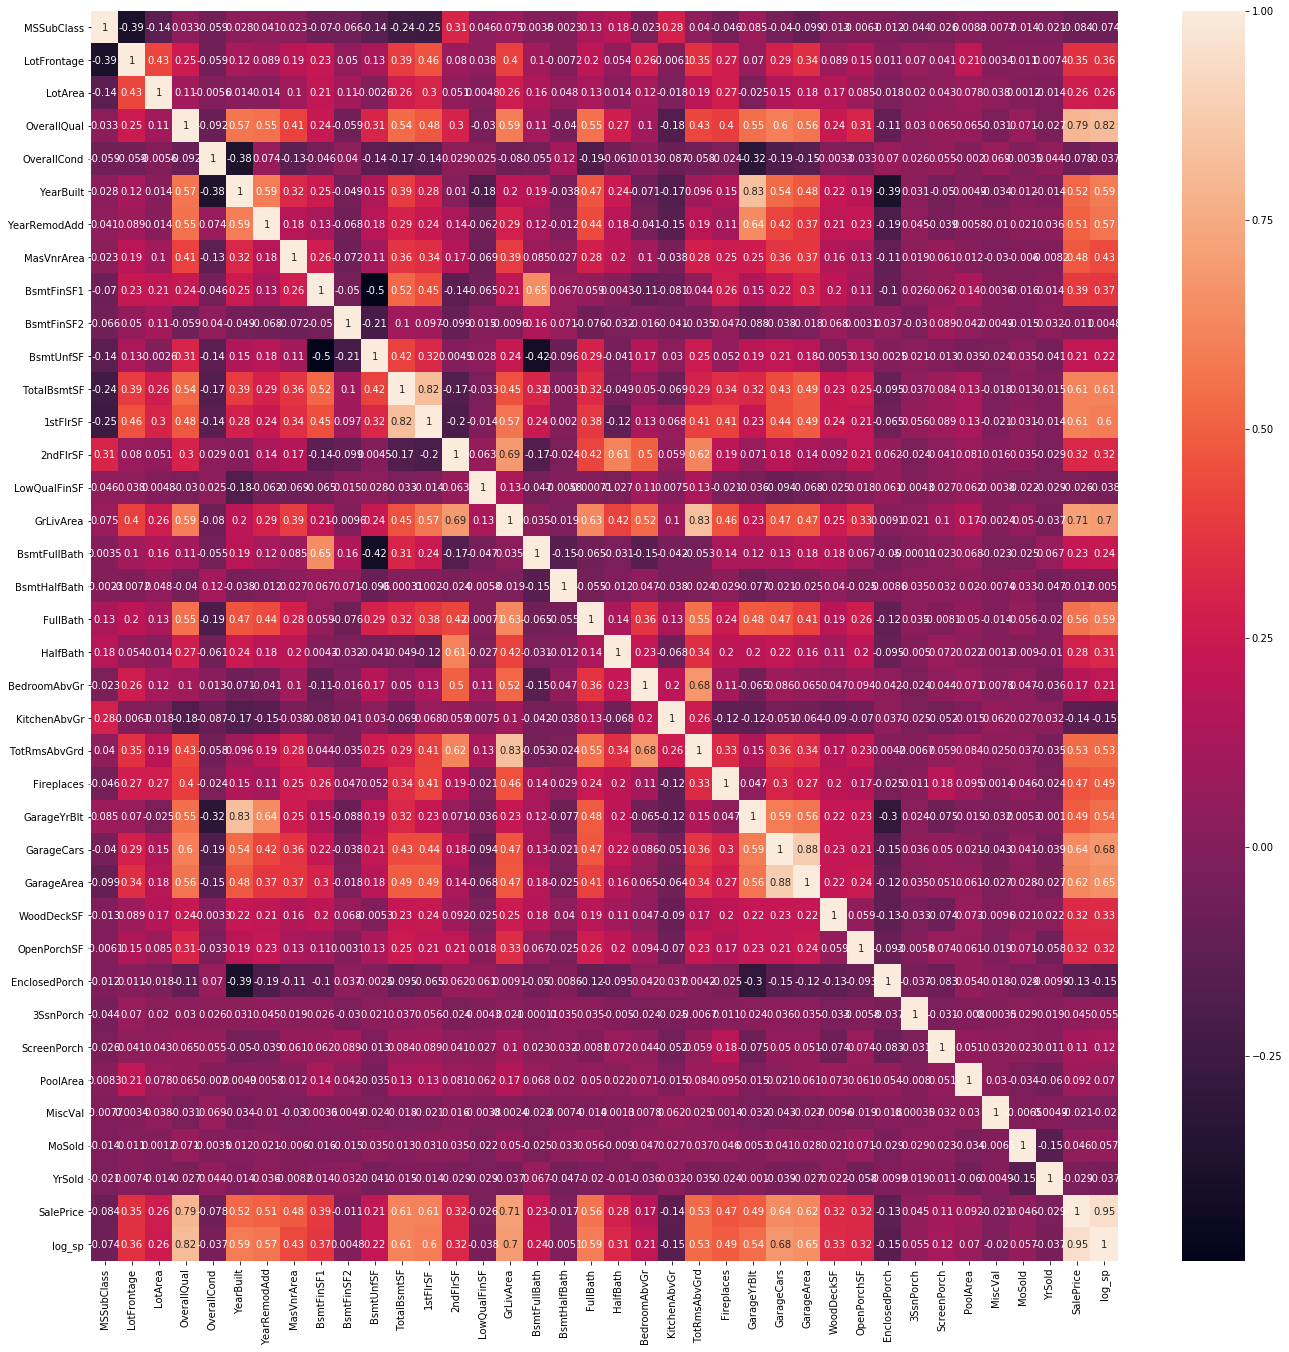

In [17]:
plt.subplots(figsize=(23,23))
# plot the heatmap and annotation on it ,and note how dependent 'SalePrice' is on other features.
sns.heatmap(correlation, xticklabels=correlation.columns, yticklabels=correlation.columns, annot=True)#Visual deppiction of the correlation matrix helps in the better understanding of the inter-relations.

 Thus ,taking a keen look at the above heat map ,we can easily spot that SalePrice is most saffected by 'OverallQual' ,'GrLivArea' ,etc.

In [18]:
tr.OverallQual.head()

0    7
1    6
2    7
3    7
4    8
Name: OverallQual, dtype: int64

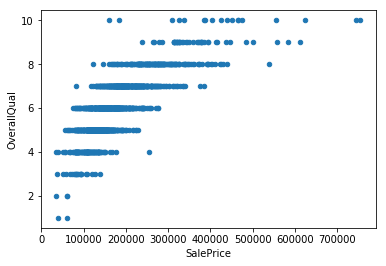

In [19]:
tr.plot.scatter(x='SalePrice', y= 'OverallQual')#Scatter Plot to visualize the relationship between 'SalePrice' and 'OverallQual' 
#Also ,Note that there are not much outliers ,so no need of manipulating the dataframe.               

In [20]:
tr.GrLivArea.head()

0    1710
1    1262
2    1786
3    1717
4    2198
Name: GrLivArea, dtype: int64

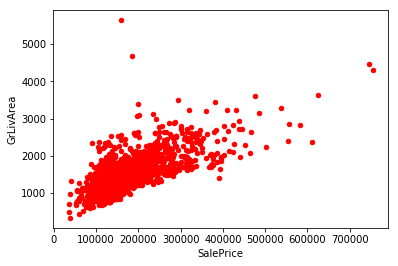

In [21]:
tr.plot.scatter(x='SalePrice', y= 'GrLivArea', c='red')#Scatter Plot to visualize the relationship between 'SalePrice' and 'GrLivArea'
               #Also ,Note that there one or two outliers ,so no need of manipulating the dataframe.

In [22]:
tr.GarageArea.head()

0    548
1    460
2    608
3    642
4    836
Name: GarageArea, dtype: int64

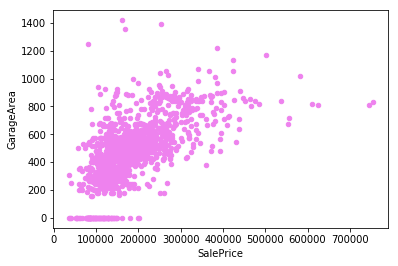

In [23]:
tr.plot.scatter(x='SalePrice', y= 'GarageArea', c='violet')#Scatter Plot to visualize the relationship between 'SalePrice' and 'GrLivArea'
               

In [24]:
tr = tr[tr['GarageArea'] < 1200]#Removing outliers
tr.shape

(1455, 81)

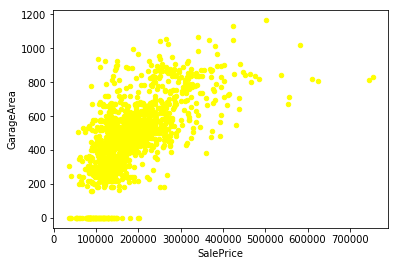

In [25]:
tr.plot.scatter(x='SalePrice', y= 'GarageArea', c='yellow')#Scatter plot after removing outliers

In [26]:
nulls = pd.DataFrame(tr.isnull().sum().sort_values(ascending=False)[:38])#getting the number of null values in feature columns
nulls.columns = ['Null Count']
nulls.index.name = 'Feature'

In [27]:
print(nulls)#Looking at the data, I infer that the missing data has a very tiniature impact on what it does to'SalePrice'. So, making no changes on the dataset ,lets get on to making a model.

              Null Count
Feature                 
PoolQC              1449
MiscFeature         1402
Alley               1364
Fence               1174
FireplaceQu          689
LotFrontage          258
GarageYrBlt           81
GarageType            81
GarageQual            81
GarageCond            81
GarageFinish          81
BsmtFinType2          38
BsmtExposure          38
BsmtCond              37
BsmtFinType1          37
BsmtQual              37
MasVnrArea             8
MasVnrType             8
Electrical             1
RoofStyle              0
RoofMatl               0
ExterQual              0
Exterior1st            0
Exterior2nd            0
YearBuilt              0
ExterCond              0
Foundation             0
YearRemodAdd           0
log_sp                 0
OverallCond            0
OverallQual            0
HouseStyle             0
BldgType               0
Condition2             0
Condition1             0
Neighborhood           0
LandSlope              0
LotConfig              0


# 5. Preparing the Model using Train DataSet using train_test_split() method from sklearn.

In [28]:
tr = tr.select_dtypes(include=[np.number]).interpolate().dropna()
tr.shape
#select only that feature that is numeric and dropping NaN values.

(1455, 38)

In [29]:
x = tr.drop(['SalePrice','log_sp'], axis=1)
x.shape
#Dropping SalePrice and log_sp as we are going to predict these by fitting the data in our model.

(1455, 36)

In [30]:
y = np.log(tr.SalePrice)
y.shape

(1455,)

In [31]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=1)

# 6. Fitting the Data .

In [32]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [33]:
predictions = lm.predict(x_test)# making predictions using predict() method



In [34]:
print("intercept is :",lm.intercept_)#Displaying the regression constants
print(lm.coef_)

intercept is : 15.016852771320325
[-4.21629370e-04  3.88789613e-04  2.08872839e-06  7.52362915e-02
  4.77165655e-02  3.04067402e-03  1.31539876e-03 -1.47228051e-05
  6.91330724e-05  2.03909393e-05  8.65358634e-06  9.81775980e-05
  8.46700486e-05  8.22911121e-05 -3.93679747e-05  1.27593186e-04
  3.39190801e-02  1.38026334e-03  2.56527926e-02  1.88143258e-02
 -6.48311075e-03 -6.76564735e-02  1.24890336e-02  4.11624967e-02
 -2.57519237e-04  3.30336449e-02  1.42976110e-04  8.50522360e-05
 -1.00882629e-05  1.97948653e-04  1.41621645e-04  2.66208852e-04
  1.73385679e-05 -5.27113376e-06  1.62437535e-04 -6.23490104e-03]


In [35]:
feat_coeff = pd.DataFrame(lm.coef_, x.columns, columns=['Coefficient'])#the regression model has to find the most optimal coefficients for all the attributes. To see what coefficients our regression model has chosen,lets take a look at the code.
feat_coeff

,Coefficient
MSSubClass,-0.000422
LotFrontage,0.000389
LotArea,0.000002
OverallQual,0.075236
OverallCond,0.047717
YearBuilt,0.003041
YearRemodAdd,0.001315
MasVnrArea,-0.000015
BsmtFinSF1,0.000069
BsmtFinSF2,0.000020


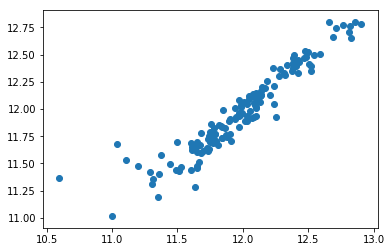

In [36]:
plt.scatter(y_test,predictions)
#plotting our predictions


In [37]:
predicted_df = pd.DataFrame({'Actual': y_test, 'Predicted': predictions})
predicted_df

,Actual,Predicted
1379,12.028739,11.888085
1359,12.660328,12.801091
1094,11.767568,11.783847
920,12.211060,12.126778
37,11.938193,11.907590
1228,12.813918,12.703601
1274,11.842229,11.731078
91,11.498827,11.692595
1273,12.083905,12.055574
1133,12.386309,12.373060


In [38]:
print ('RMSE is: \n', mean_squared_error(y_test, predictions))

RMSE is: 
 0.01728006094326084


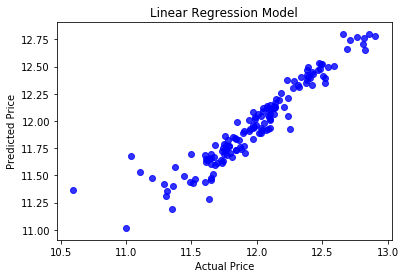

In [39]:
actual_values = y_test
plt.scatter( actual_values,predictions, alpha=.8,
            color='b') #alpha helps to show overlapping data

plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Linear Regression Model')
plt.show()


In [40]:
lm.score(x_test,y_test)

0.8929964019904535

# 7.Creating the Submission.

In [41]:
test=pd.read_csv("test.csv")
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [42]:
pred_val = pd.DataFrame()

In [43]:
pred_val['Id'] = test.Id

In [44]:
pred_val.head()

,Id
0,1461
1,1462
2,1463
3,1464
4,1465


In [45]:
features = test.select_dtypes(include=[np.number]).drop(['Id'], axis=1).interpolate()#new datframe

In [46]:
features.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,20,80.0,11622,5,6,1961,1961,0.0,468.0,144.0,...,730.0,140,0,0,0,120,0,0,6,2010
1,20,81.0,14267,6,6,1958,1958,108.0,923.0,0.0,...,312.0,393,36,0,0,0,0,12500,6,2010
2,60,74.0,13830,5,5,1997,1998,0.0,791.0,0.0,...,482.0,212,34,0,0,0,0,0,3,2010
3,60,78.0,9978,6,6,1998,1998,20.0,602.0,0.0,...,470.0,360,36,0,0,0,0,0,6,2010
4,120,43.0,5005,8,5,1992,1992,0.0,263.0,0.0,...,506.0,0,82,0,0,144,0,0,1,2010


In [47]:
predictions = lm.predict(features)

In [48]:
final_predictions = np.exp(predictions)

In [49]:
pred_val['SalePrice'] = final_predictions

In [50]:
pred_val.head()

,Id,SalePrice
0,1461,124929.869831
1,1462,141017.659717
2,1463,173045.235633
3,1464,196259.155367
4,1465,179804.872662


In [51]:
pred_val.to_csv('House_Price.csv', index=False)#Creating the csv file of our Final Prediction DataFrame.

# 8. Checking the submission.

In [52]:
sub=pd.read_csv("House_Price.csv")

In [54]:
sub.head()

,Id,SalePrice
0,1461,124929.869831
1,1462,141017.659717
2,1463,173045.235633
3,1464,196259.155367
4,1465,179804.872662
